In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [37]:
#dataset = pd.read_csv("AirQualityUCI.csv",skiprows=2)
dataset = pd.read_excel('AirQualityUCI.xlsx')

In [38]:
dataset.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [39]:
dataset.shape

(9357, 15)

In [42]:
from sklearn.impute import SimpleImputer
# replace the values which are nan with its mean
imputer = SimpleImputer(missing_values = np.nan ,strategy = 'mean')

In [51]:
X = dataset.iloc[:,2:12].values
imputer = imputer.fit(X)
y = dataset.iloc[:,13].values

In [49]:
print(X)

[[   2.6  1360.    150.   ...  113.   1692.   1267.5 ]
 [   2.   1292.25  112.   ...   92.   1558.75  972.25]
 [   2.2  1402.     88.   ...  114.   1554.5  1074.  ]
 ...
 [   2.4  1142.   -200.   ...  174.7  1240.75 1092.  ]
 [   2.1  1002.5  -200.   ...  155.7  1041.    769.75]
 [   2.2  1070.75 -200.   ...  167.7  1128.5   816.  ]]


In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [53]:
print("X_trian shape --> {}".format(X_train.shape))
print("y_train shape --> {}".format(y_train.shape))
print("X_test shape --> {}".format(X_test.shape))
print("y_test shape --> {}".format(y_test.shape))

X_trian shape --> (7485, 10)
y_train shape --> (7485,)
X_test shape --> (1872, 10)
y_test shape --> (1872,)


In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
print("Predicted values:", regressor.predict(X_test))

Predicted values: [  39.38773396   58.76634838   50.15477807 ... -204.31904952   49.85466694
   43.40484813]


In [57]:
print("R^2 score for liner regression: ", regressor.score(X_test, y_test))

R^2 score for liner regression:  0.9331065887418004


### Support Vector Regression

In [58]:
from sklearn.svm import SVR
support_regressor = SVR(kernel='rbf', C=1000)
support_regressor.fit(X_train, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [59]:
print("Coefficient of determination R^2 <-- on train set: {}".format(support_regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9619967540002431


In [60]:
print("Coefficient of determination R^2 <-- on test set: {}".format(support_regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9609939658213166


#  Decision Tree Regressor

In [61]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [62]:
print("Coefficient of determination R^2 <-- on train set: {}".format(dtr.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 1.0


In [63]:
print("Coefficient of determination R^2 <-- on test set: {}".format(dtr.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.92716904586231


# Lasso Regression

In [65]:
from sklearn.linear_model import Lasso
indiana_jones = Lasso(alpha=1.0)
indiana_jones.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
print("Coefficient of determination R^2 <-- on train set : {}".format(indiana_jones.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set : 0.9350782964147398


In [67]:
print("Coefficient of determination R^2 <-- on test set: {}".format(indiana_jones.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.9331026734063707


# Polynomial Regression

In [70]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
from sklearn.linear_model import LinearRegression
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [72]:
print("Coefficient of determination R^2 <-- on train set : {}".format(lin_reg_2.score(X_poly, y_train)))

Coefficient of determination R^2 <-- on train set : 0.9775236425127797


In [76]:
test = poly_reg.fit_transform(X_test)
print("Coefficient of determination R^2 <-- on test set: {}".format(lin_reg_2.score(test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.7617860503180833


# Feature Selection

In [77]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(n_estimators=300)
etr.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=300, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [79]:
print(etr.feature_importances_)
indecis = np.argsort(etr.feature_importances_)[::-1]

[0.00485459 0.16293543 0.00180029 0.42929939 0.08822422 0.01179715
 0.10214594 0.0112465  0.11034375 0.07735275]


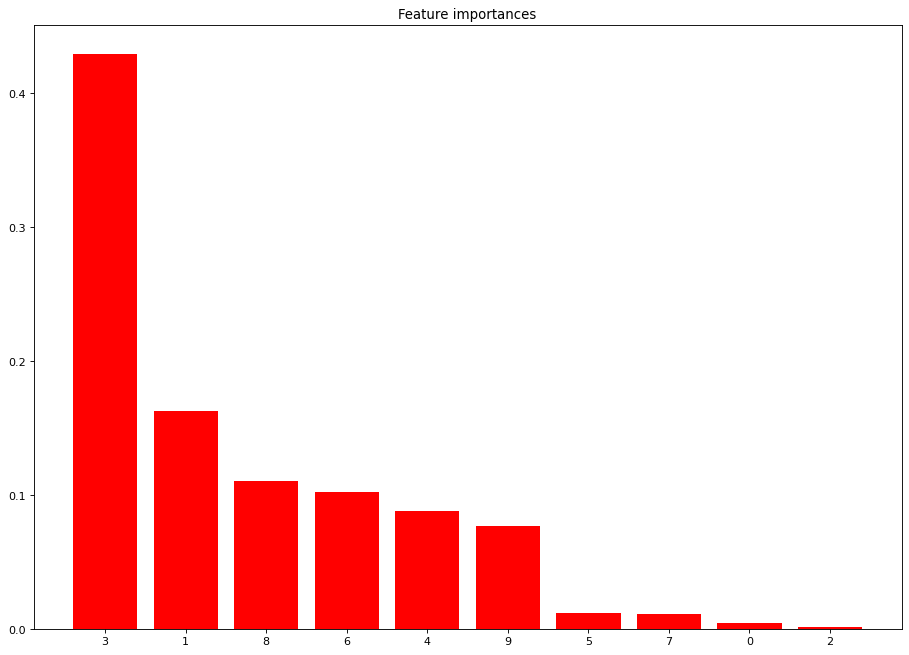

In [80]:
plt.figure(num=None, figsize=(14, 10), dpi=80, facecolor='w')
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), etr.feature_importances_[indecis],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), indecis)
plt.show()